In [1]:

import clip
import torch
from PIL import Image

In [2]:
classes = ["badger", "chipmunk"]
class_dict = {i + 1: classes[i] for i in range(len(classes))}


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
predict = []

C:\Users\azari\AppData\Local\Programs\Python\opencv_labs\lib\site-packages\clip\clip.py:57: UserWarning: C:\Users\azari/.cache/clip\ViT-B-32.pt exists, but the SHA256 checksum does not match; re-downloading the file
  warnings.warn(f"{download_target} exists, but the SHA256 checksum does not match; re-downloading the file")
100%|████████████████████████████████████████| 338M/338M [36:21<00:00, 162kiB/s]


In [14]:
from pathlib import Path

image_paths = list((Path('data').iterdir()))
image_paths

[WindowsPath('data/img.png'),
 WindowsPath('data/img_1.png'),
 WindowsPath('data/istockphoto-538040235-612x612.jpg')]

In [15]:
res_pairs = []
for i in image_paths:
    image = preprocess(Image.open(i)).unsqueeze(0).to(device)
    text = clip.tokenize(classes).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image)
        text_features = model.encode_text(text)

        logits_per_image, logits_per_text = model(image, text)
        probs = logits_per_image.softmax(dim=-1).cpu().numpy()

    res = 0
    pos = -1
    for j in range(len(probs[0])):
        if probs[0][j] > res:
            res = probs[0][j]
            pos = j + 1
    res_pairs.append((i, class_dict[pos]))


In [16]:
res_pairs

[(WindowsPath('data/img.png'), 'badger'),
 (WindowsPath('data/img_1.png'), 'chipmunk'),
 (WindowsPath('data/istockphoto-538040235-612x612.jpg'), 'chipmunk')]

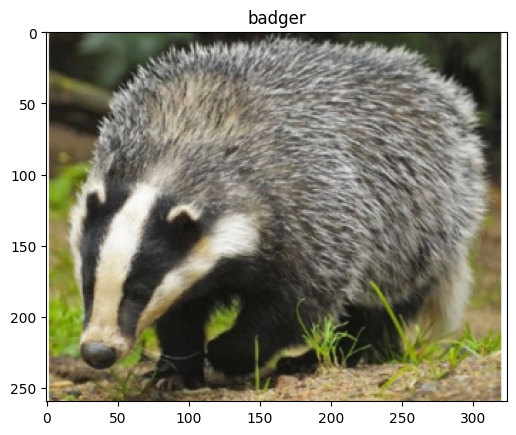

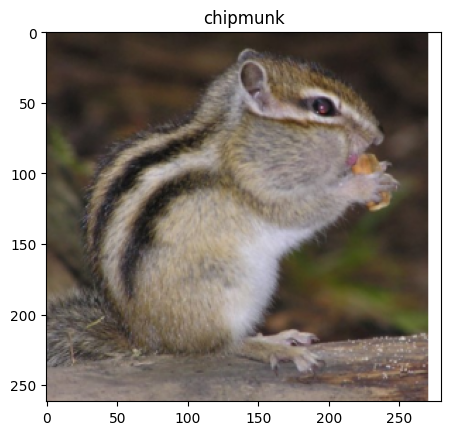

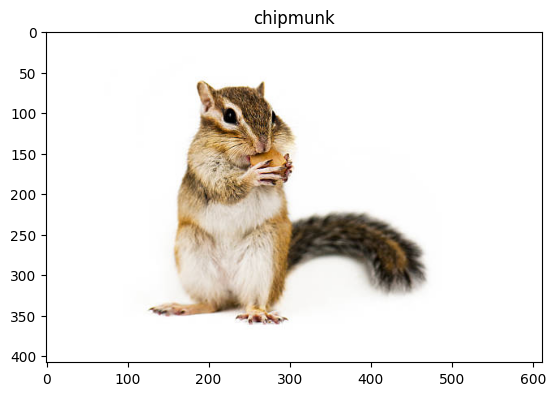

In [17]:
import numpy as np
from matplotlib import pyplot as plt

for image_path, label in res_pairs:
    pil_im = Image.open(image_path)  #Take jpg + png
    #import requests
    #r = requests.get('https://www.vegvesen.no/public/webkamera/kamera?id=131206')
    #pil_im = Image.open(BytesIO(r.content))
    im_array = np.asarray(pil_im)
    plt.imshow(im_array)
    plt.title(label)
    plt.show()